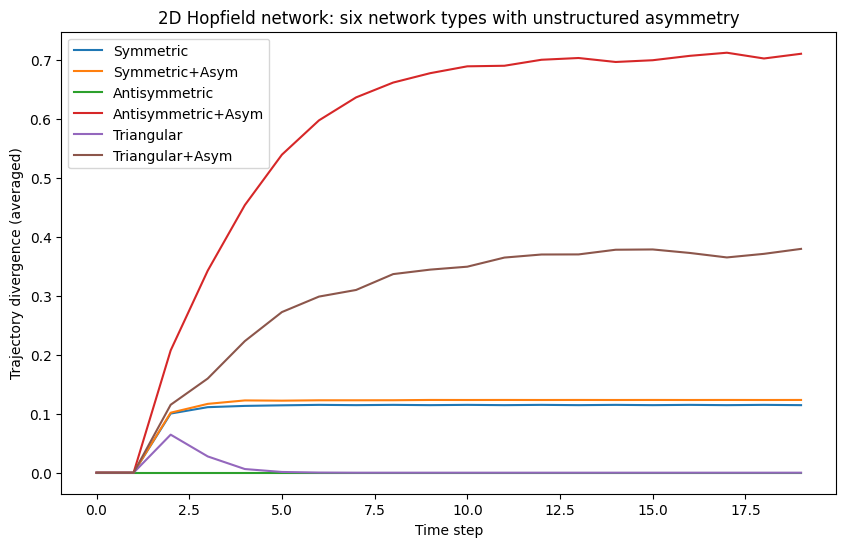

In [31]:
#non-periodic with sign
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def flatten_index(i, j, N_y):
    return i * N_y + j

def run_hopfield_stepwise(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = sign(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

# ----------------------------
# Parameters
# ----------------------------
N_x = 5
N_y = 5
N = N_x * N_y
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.01  # unstructured asymmetry

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = flatten_index(N_x//2, N_y//2, N_y)
neuron_B = flatten_index(N_x//2, N_y//2 + 1, N_y)
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {
    'Symmetric': np.zeros(T),
    'Symmetric+Asym': np.zeros(T),
    'Antisymmetric': np.zeros(T),
    'Antisymmetric+Asym': np.zeros(T),
    'Triangular': np.zeros(T),
    'Triangular+Asym': np.zeros(T)
}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random 2D patterns, flatten
    patterns_2d = np.random.choice([-1,1], size=(p, N_x, N_y))
    patterns = patterns_2d.reshape(p, N)
    
    # Base matrices
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    np.fill_diagonal(W_sym, 0)
    
    W_antisym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_antisym - W_antisym.T
    np.fill_diagonal(W_antisym, 0)
    
    W_tri = sum(np.outer(p, p) for p in patterns)/N
    W_tri = np.triu(W_tri, k=1)
    np.fill_diagonal(W_tri, 0)
    
    # Unstructured random asymmetry
    rand_asym = np.random.randn(N, N) * asym_strength
    
    # Add unstructured asymmetry
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    
    # Ensure zero diagonal
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # Network dictionary
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_stepwise(W, order1, T)
        traj2 = run_hopfield_stepwise(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot results
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("2D Hopfield network: six network types with unstructured asymmetry")
plt.legend()
plt.show()


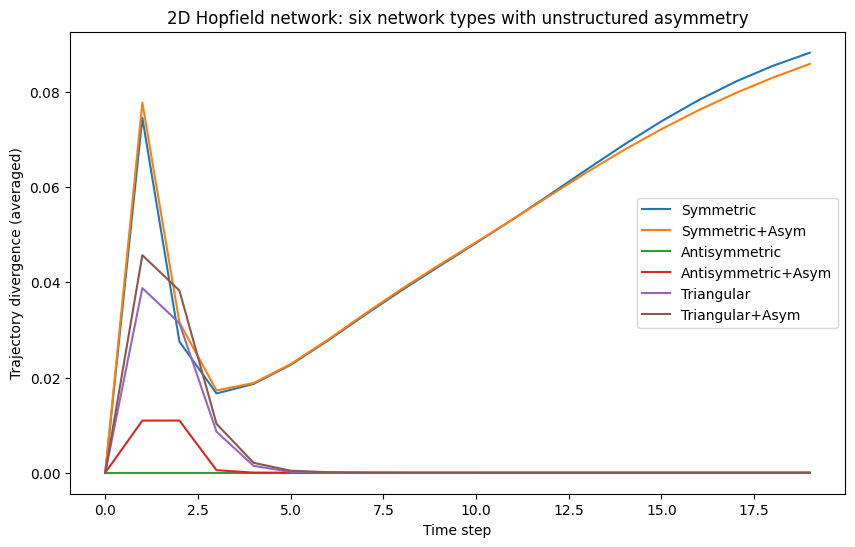

In [32]:
#non-periodic with tanh
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def flatten_index(i, j, N_y):
    return i * N_y + j

def run_hopfield_stepwise(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = np.tanh(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

# ----------------------------
# Parameters
# ----------------------------
N_x = 5
N_y = 5
N = N_x * N_y
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.01  # unstructured asymmetry

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = flatten_index(N_x//2, N_y//2, N_y)
neuron_B = flatten_index(N_x//2, N_y//2 + 1, N_y)
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {
    'Symmetric': np.zeros(T),
    'Symmetric+Asym': np.zeros(T),
    'Antisymmetric': np.zeros(T),
    'Antisymmetric+Asym': np.zeros(T),
    'Triangular': np.zeros(T),
    'Triangular+Asym': np.zeros(T)
}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random 2D patterns, flatten
    patterns_2d = np.random.choice([-1,1], size=(p, N_x, N_y))
    patterns = patterns_2d.reshape(p, N)
    
    # Base matrices
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    np.fill_diagonal(W_sym, 0)
    
    W_antisym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_antisym - W_antisym.T
    np.fill_diagonal(W_antisym, 0)
    
    W_tri = sum(np.outer(p, p) for p in patterns)/N
    W_tri = np.triu(W_tri, k=1)
    np.fill_diagonal(W_tri, 0)
    
    # Unstructured random asymmetry
    rand_asym = np.random.randn(N, N) * asym_strength
    
    # Add unstructured asymmetry
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    
    # Ensure zero diagonal
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # Network dictionary
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_stepwise(W, order1, T)
        traj2 = run_hopfield_stepwise(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot results
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("2D Hopfield network: six network types with unstructured asymmetry")
plt.legend()
plt.show()


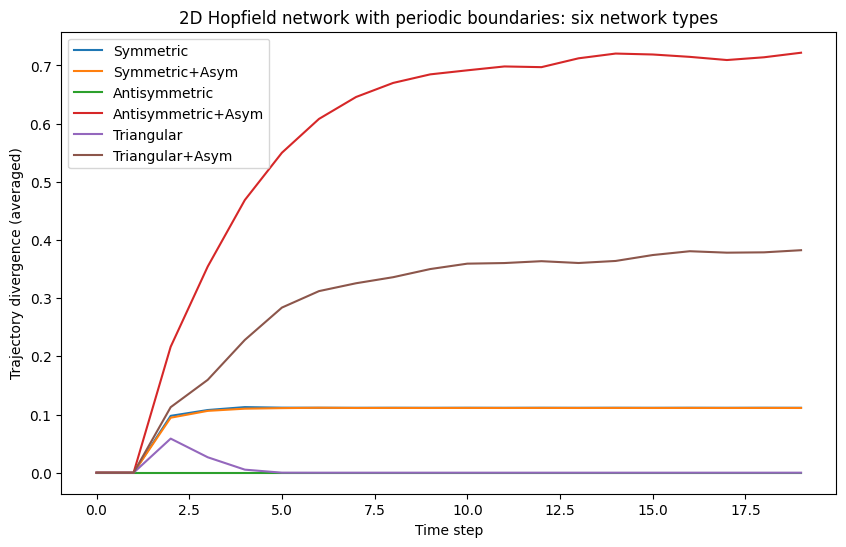

In [33]:
#periodic with sign
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def flatten_index(i, j, N_y):
    return i * N_y + j

def run_hopfield_stepwise(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = sign(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

# ----------------------------
# Parameters
# ----------------------------
N_x = 5
N_y = 5
N = N_x * N_y
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.01  # unstructured asymmetry

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = flatten_index(N_x//2, N_y//2, N_y)
neuron_B = flatten_index(N_x//2, N_y//2 + 1, N_y)
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {name: np.zeros(T) for name in [
    'Symmetric', 'Symmetric+Asym',
    'Antisymmetric', 'Antisymmetric+Asym',
    'Triangular', 'Triangular+Asym'
]}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random 2D patterns
    patterns_2d = np.random.choice([-1,1], size=(p, N_x, N_y))
    patterns = patterns_2d.reshape(p, N)
    
    # ----------------------------
    # Base matrices
    # ----------------------------
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_sym - W_sym.T
    W_tri = np.triu(sum(np.outer(p, p) for p in patterns)/N, k=1)
    
    # ----------------------------
    # Add 2D periodic connections
    # ----------------------------
    def add_periodic(W_base):
        W_periodic = W_base.copy()
        for i in range(N_x):
            for j in range(N_y):
                idx = flatten_index(i,j,N_y)
                # Right neighbor wrap
                right_j = (j+1)%N_y
                right_idx = flatten_index(i, right_j, N_y)
                W_periodic[idx, right_idx] = W_base[idx, right_idx]
                # Bottom neighbor wrap
                bottom_i = (i+1)%N_x
                bottom_idx = flatten_index(bottom_i, j, N_y)
                W_periodic[idx, bottom_idx] = W_base[idx, bottom_idx]
        np.fill_diagonal(W_periodic, 0)
        return W_periodic
    
    W_sym = add_periodic(W_sym)
    W_antisym = add_periodic(W_antisym)
    W_tri = add_periodic(W_tri)
    
    # ----------------------------
    # Unstructured random asymmetry
    # ----------------------------
    rand_asym = np.random.randn(N, N) * asym_strength
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # ----------------------------
    # Networks dictionary
    # ----------------------------
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_stepwise(W, order1, T)
        traj2 = run_hopfield_stepwise(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("2D Hopfield network with periodic boundaries: six network types")
plt.legend()
plt.show()


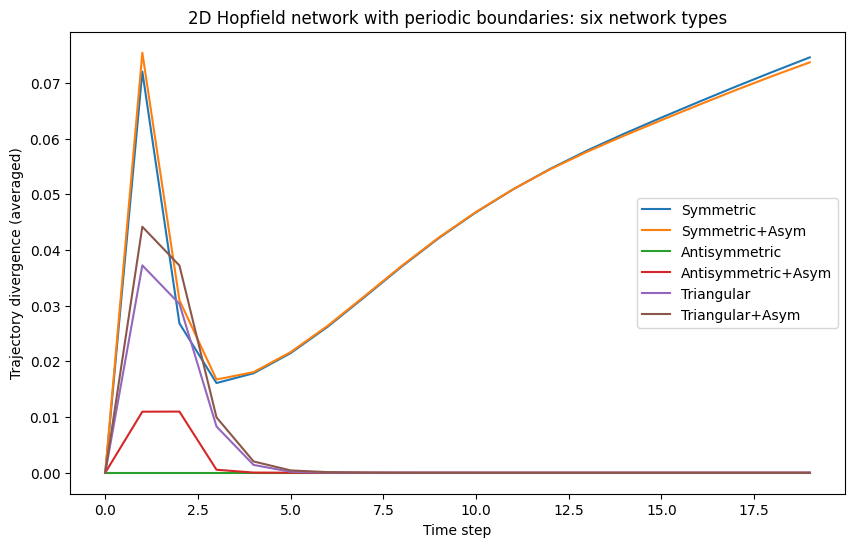

In [34]:
#Periodic with tanh
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helper functions
# ----------------------------
def flatten_index(i, j, N_y):
    return i * N_y + j

def run_hopfield_stepwise(W, excite_order, T):
    N = W.shape[0]
    s = np.zeros(N, dtype=float)
    traj = np.zeros((T, N), dtype=float)
    
    for t in range(T):
        for idx, excite_time in excite_order:
            if t == excite_time:
                s[idx] = 1.0
        s = np.tanh(W @ s)
        traj[t] = s
    return traj

def trajectory_divergence(traj1, traj2):
    return np.mean(np.abs(traj1 - traj2), axis=1)

# ----------------------------
# Parameters
# ----------------------------
N_x = 5
N_y = 5
N = N_x * N_y
T = 20
p = 3
num_realizations = 1000
asym_strength = 0.01  # unstructured asymmetry

# ----------------------------
# Middle neurons
# ----------------------------
neuron_A = flatten_index(N_x//2, N_y//2, N_y)
neuron_B = flatten_index(N_x//2, N_y//2 + 1, N_y)
order1 = [(neuron_A, 1), (neuron_B, 2)]
order2 = [(neuron_B, 1), (neuron_A, 2)]

# ----------------------------
# Containers for divergence
# ----------------------------
divergences = {name: np.zeros(T) for name in [
    'Symmetric', 'Symmetric+Asym',
    'Antisymmetric', 'Antisymmetric+Asym',
    'Triangular', 'Triangular+Asym'
]}

# ----------------------------
# Realizations loop
# ----------------------------
for realization in range(num_realizations):
    # Generate random 2D patterns
    patterns_2d = np.random.choice([-1,1], size=(p, N_x, N_y))
    patterns = patterns_2d.reshape(p, N)
    
    # ----------------------------
    # Base matrices
    # ----------------------------
    W_sym = sum(np.outer(p, p) for p in patterns)/N
    W_antisym = W_sym - W_sym.T
    W_tri = np.triu(sum(np.outer(p, p) for p in patterns)/N, k=1)
    
    # ----------------------------
    # Add 2D periodic connections
    # ----------------------------
    def add_periodic(W_base):
        W_periodic = W_base.copy()
        for i in range(N_x):
            for j in range(N_y):
                idx = flatten_index(i,j,N_y)
                # Right neighbor wrap
                right_j = (j+1)%N_y
                right_idx = flatten_index(i, right_j, N_y)
                W_periodic[idx, right_idx] = W_base[idx, right_idx]
                # Bottom neighbor wrap
                bottom_i = (i+1)%N_x
                bottom_idx = flatten_index(bottom_i, j, N_y)
                W_periodic[idx, bottom_idx] = W_base[idx, bottom_idx]
        np.fill_diagonal(W_periodic, 0)
        return W_periodic
    
    W_sym = add_periodic(W_sym)
    W_antisym = add_periodic(W_antisym)
    W_tri = add_periodic(W_tri)
    
    # ----------------------------
    # Unstructured random asymmetry
    # ----------------------------
    rand_asym = np.random.randn(N, N) * asym_strength
    W_sym_asym = W_sym + rand_asym
    W_antisym_asym = W_antisym + rand_asym
    W_tri_asym = W_tri + rand_asym
    np.fill_diagonal(W_sym_asym, 0)
    np.fill_diagonal(W_antisym_asym, 0)
    np.fill_diagonal(W_tri_asym, 0)
    
    # ----------------------------
    # Networks dictionary
    # ----------------------------
    networks = {
        'Symmetric': W_sym,
        'Symmetric+Asym': W_sym_asym,
        'Antisymmetric': W_antisym,
        'Antisymmetric+Asym': W_antisym_asym,
        'Triangular': W_tri,
        'Triangular+Asym': W_tri_asym
    }
    
    # Run each network
    for name, W in networks.items():
        traj1 = run_hopfield_stepwise(W, order1, T)
        traj2 = run_hopfield_stepwise(W, order2, T)
        divergences[name] += trajectory_divergence(traj1, traj2)

# ----------------------------
# Average over realizations
# ----------------------------
for name in divergences:
    divergences[name] /= num_realizations

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(10,6))
for name, D in divergences.items():
    plt.plot(D, label=name)
plt.xlabel("Time step")
plt.ylabel("Trajectory divergence (averaged)")
plt.title("2D Hopfield network with periodic boundaries: six network types")
plt.legend()
plt.show()
